1. Data Collection and Preprocessing
● Load the dataset using Pandas.
● Handle missing values.
● Perform exploratory data analysis (EDA) using Matplotlib or Seaborn.
● Normalize/scale the data if necessary.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset = pd.read_excel('cleandata_with_humidity.xlsx')

# Display first few rows
print(dataset.head())

# Summary statistics
print(dataset.describe())

                 date  Power Consumption  Outdoor Temperature  Occupancy  \
0 2018-05-22 00:00:00              71.98                15.72          1   
1 2018-05-22 00:15:00              71.00                15.37          1   
2 2018-05-22 00:30:00              65.20                15.27          0   
3 2018-05-22 00:45:00              95.90                16.03          0   
4 2018-05-22 01:00:00              43.60                15.28          0   

   Humidity  
0     52.47  
1     87.04  
2     73.92  
3     65.92  
4     39.36  
                                date  Power Consumption  Outdoor Temperature  \
count                          21262       21262.000000         21262.000000   
mean   2018-09-09 19:57:39.636910848          71.502539            14.673092   
min              2018-05-22 00:00:00           4.590000             5.870000   
25%              2018-07-18 05:03:45          57.090000            11.880000   
50%              2018-09-17 05:15:00          69.000000    

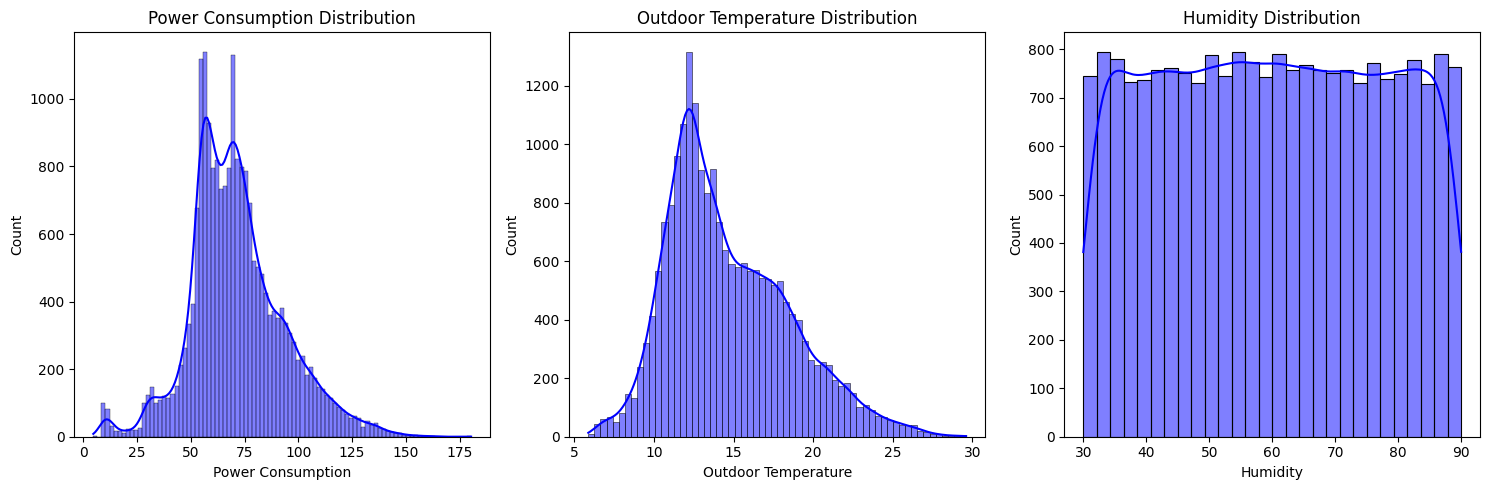

In [2]:
# Continuous variable distributions
plt.figure(figsize=(15, 5))
for i, column in enumerate(['Power Consumption', 'Outdoor Temperature', 'Humidity']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(dataset[column], kde=True, color='blue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


<ipython-input-14-c9e5e8d43036>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Occupancy', data=dataset, palette='viridis')


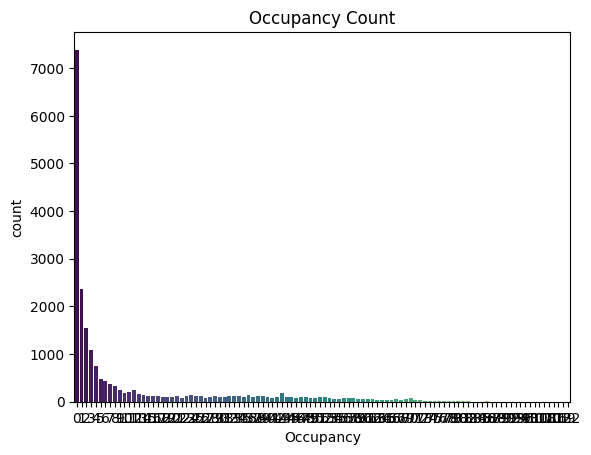

In [14]:
sns.countplot(x='Occupancy', data=dataset, palette='viridis')
plt.title('Occupancy Count')
plt.show()



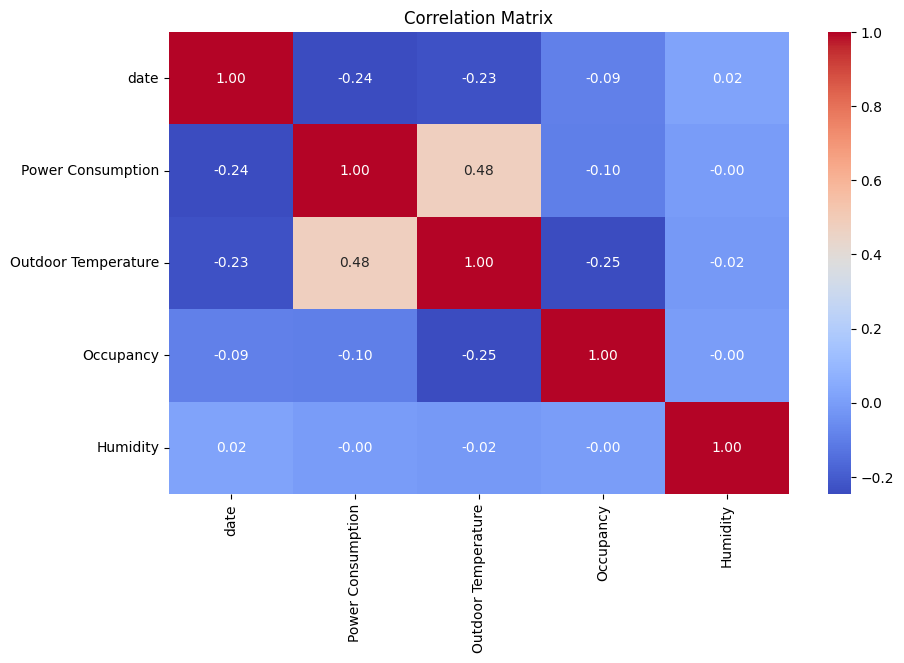

In [13]:
# Compute correlation matrix
correlation_matrix = dataset.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


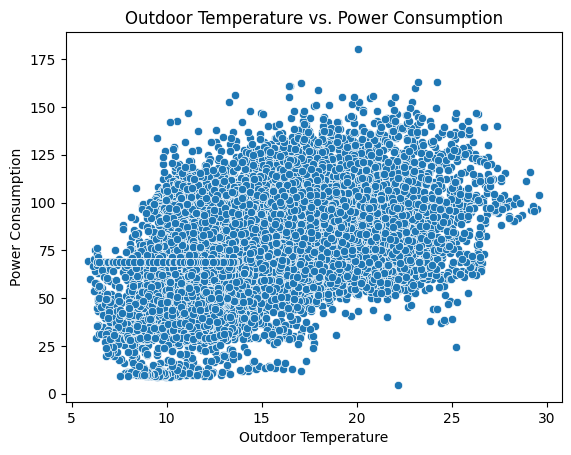

In [12]:
sns.scatterplot(x='Outdoor Temperature', y='Power Consumption', data=dataset)
plt.title('Outdoor Temperature vs. Power Consumption')
plt.show()


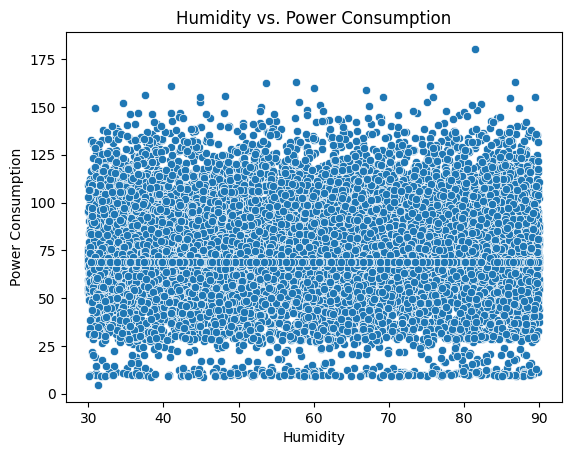

In [11]:
sns.scatterplot(x='Humidity', y='Power Consumption', data=dataset)
plt.title('Humidity vs. Power Consumption')
plt.show()



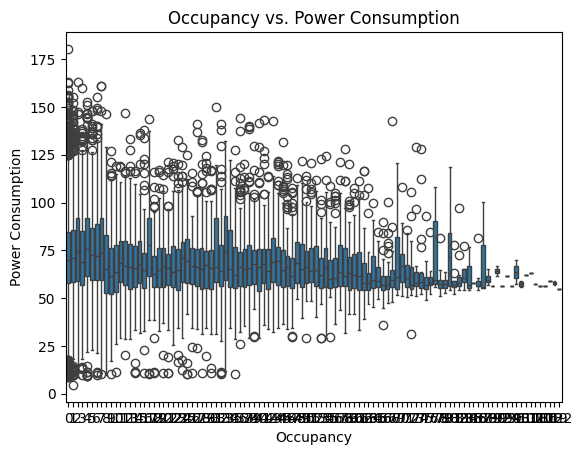

In [15]:
sns.boxplot(x='Occupancy', y='Power Consumption', data=dataset)
plt.title('Occupancy vs. Power Consumption')
plt.show()


date                   0
Power Consumption      0
Outdoor Temperature    0
Occupancy              0
Humidity               0
dtype: int64


<ipython-input-10-53d3f0f66987>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


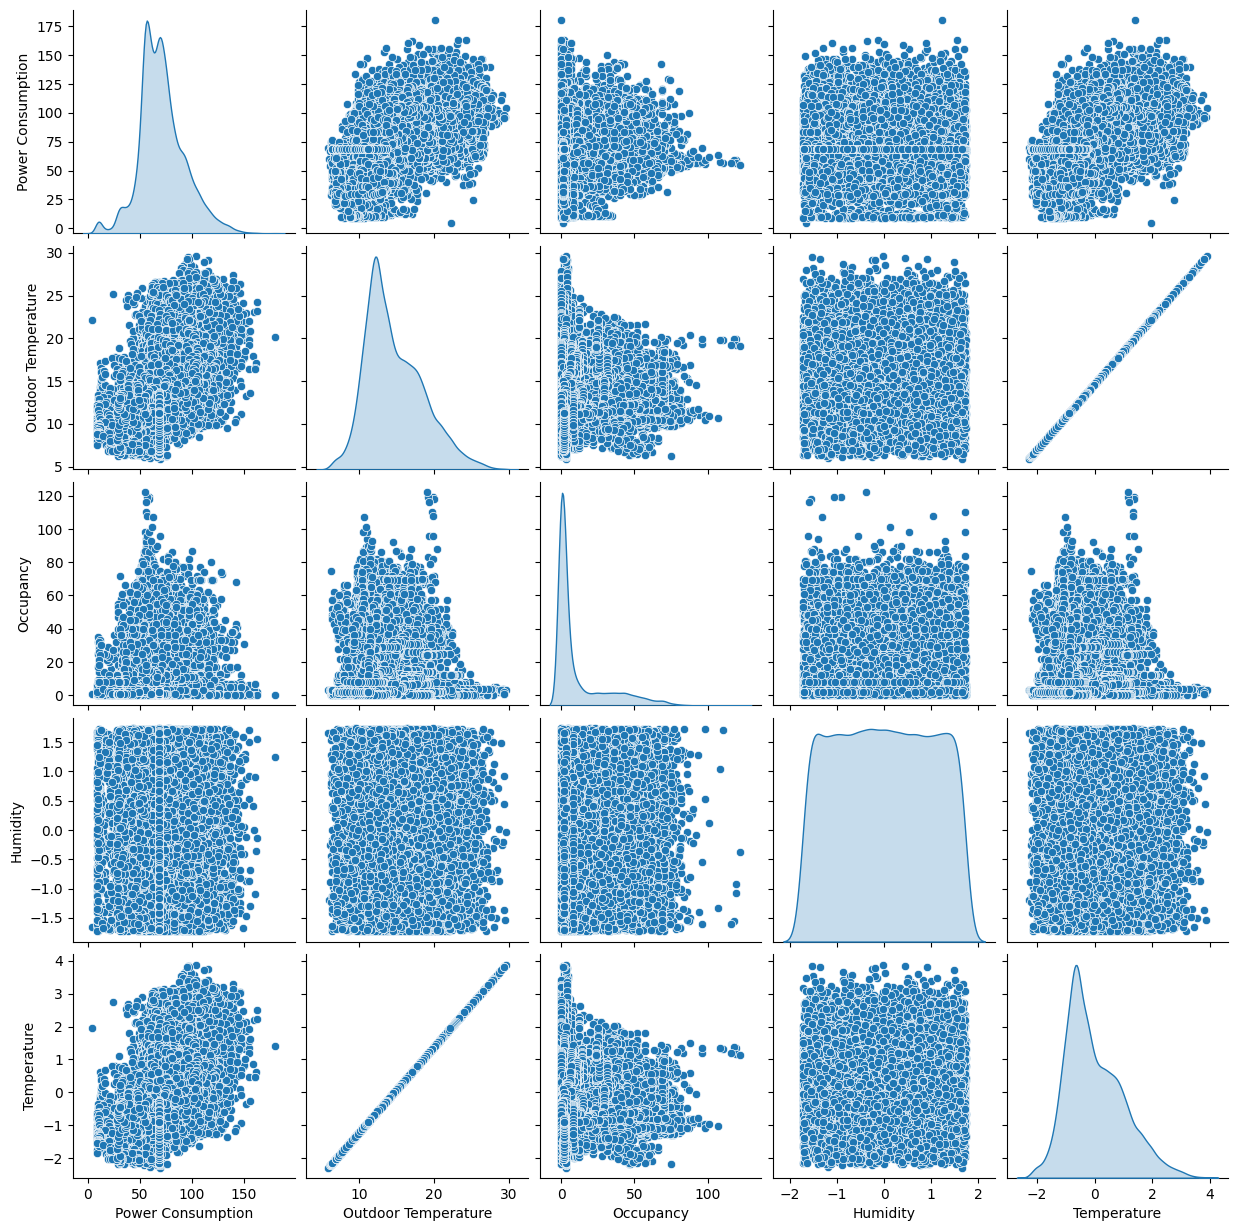

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_excel('cleandata_with_humidity.xlsx')
# Check for missing values
print(data.isnull().sum())

# Fill missing values (if any)
data.fillna(method='ffill', inplace=True)

# Normalize continuous features
scaler = StandardScaler()
data[['Temperature', 'Humidity']] = scaler.fit_transform(data[['Outdoor Temperature', 'Humidity']])

# Visualize data
sns.pairplot(data, diag_kind='kde')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd # Import pandas

# Load dataset (if not already loaded)
# Assuming 'cleandata_with_humidity.xlsx' is in the same directory
data = pd.read_excel('cleandata_with_humidity.xlsx')

# Split data
X = data[['Outdoor Temperature', 'Humidity', 'Occupancy']]
y = data['Power Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Train model
model = Ridge()
model.fit(X_train, y_train)

# Test model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 381.17643852474566


In [20]:
pip install streamlit

In [9]:
import streamlit as st
import numpy as np

# Streamlit app
st.title("Energy Consumption Prediction")

# Input fields
temperature = st.number_input("Temperature (°C)")
humidity = st.number_input("Humidity (%)")
occupancy = st.radio("Occupancy", (0, 1))

# Prediction button
if st.button("Predict"):
    # Make prediction
    # Indent the following lines to be inside the 'if' block
    # and use the input values for prediction
    input_features = np.array([[temperature, humidity, occupancy]])
    prediction = model.predict(input_features)[0]
    st.write(f"Predicted Energy Consumption: {prediction:.2f} kWh")

2024-12-01 16:05:05.739 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 16:05:05.853 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-01 16:05:05.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 16:05:05.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 16:05:05.861 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 16:05:05.863 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 16:05:05.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-01 16:05:05.866 Session state does not 

In [16]:
import joblib
joblib.dump(model, 'ridge_model.pkl')

['ridge_model.pkl']